# What Is a Neural Network?

Neural networks, also known as artificial neural networks (ANN), are a set of algorithms that are modeled after the human brain. They are an advanced form of machine learning that recognizes patterns and features of input data and provides a clear quantitative output.

In its simplest form, a neural network contains layers of neurons that perform individual computations. These computations are connected and weighed against one another until the neurons reach the final layer. In the final layer, the neurons return either a numerical result or an encoded categorical result.

Using a neural network instead of a traditional statistical or machine learning model has many advantages. For instance, neural networks can effectively detect complex relationships within data. A neural network might be able to predict future shopping behavior based on credit card transactions, or a loan applicant's likelihood of defaulting on a loan based on their application. Additionally, neural networks have greater tolerance for messy data. They can learn to ignore noisy characteristics within a large dataset.

The neural network algorithms can be too complex for humans to dissect and understand (creating a black box problem).
Neural networks are prone to overfitting (characterizing the training data so well that the model does not effectively generalize to test data).

# Perceptron, the Computational Neuron
The perceptron model is a single neural network unit. It mimics a biological neuron by receiving input data, weighting the information, and producing a clear output.

The perceptron model has four major components:

Input values, typically labeled x or χ (chi, pronounced kaai, as in eye).

A weight coefficient for each input value, typically labeled w or ω (omega). The weight coefficient determines the input value’s strength—that is, the impact the input value has on the network.

A constant value called bias, which is added to the inputs in order to help best fit the model for a given dataset. It is typically labeled w0. So, no matter how many inputs we have, there will always be an additional value to “stir the pot.”

A net summary function that aggregates all weighted inputs (note that the diagram below uses a weighted summation).

# Anatomy of a Neural Network

An input layer of input values transformed by weight coefficients.

A hidden layer that can contain a single neuron or multiple neurons.

An output layer that reports the outcome of the value.

The activation function is a mathematical function applied to the end of each neuron (that is, each individual perceptron model). This function transforms each neuron’s output into a quantitative value. The quantitative output value is then used as the input value for the next layer in the neural network model. Although activation functions can introduce both linear and nonlinear properties to a neural network, nonlinear activation functions are more common.

A wide variety of activation functions exist, and each has a specific purpose. However, most neural networks will use one of the following activation functions:

The linear function returns the sum of the weighted inputs without transformation.

The sigmoid function transforms the neuron’s output to a range between 0 and 1, which is especially useful for predicting probabilities. A neural network that uses the sigmoid function will output a model with a characteristic S curve.

The tanh function transforms the output to a range between −1 and 1, and the resulting model also forms a characteristic S curve. The tanh function is primarily used for classification between two classes.

The rectified linear unit (ReLU) function returns a value from 0 to infinity. This activation function transforms any negative input to 0. It is the most commonly used activation function in neural networks due to its faster learning and simplified output. However, it is not always appropriate for simpler models.

The leaky ReLU function is a “leaky” alternative to the ReLU function. This means that instead of transforming negative input values to 0, it transforms negative input values into much smaller negative values.

TensorFlow is an end-to-end open-source platform for machine learning. It allows us to run our code across multiple platforms in a highly efficient way.

Keras is an abstraction layer on top of TensorFlow that makes it easier to build models. We use Keras for the same reason that we use hvPlot to create charts instead of the more verbose Matplotlib library—it makes the work easier.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

In [9]:
y = y.reshape(-1, 1)

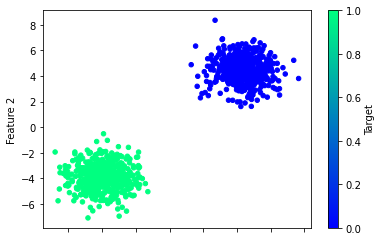

In [12]:
# Create a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plot the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Before using a neural network, we must normalize, or standardize, our data. Neural networks typically perform better with all input features on the same scale. This makes it easier for the neural network to adjust the weights in the network.

Developers commonly use scikit-learn's MinMaxScaler or StandardScaler functions to scale and normalize input features. For this example, we will use StandardScaler to scale the features data. We do not need to scale the target data (y), because it is already encoded as 0 and 1.

In [18]:
# Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Creating a Neural Network Model Using Keras
To create a neural network, we first define an instance of the model.

In this case, we will create an instance of the Sequential model and set it equal to the neuron variable. The neuron variable will store the architecture of our model, as the following code shows:

In [19]:
neuron = Sequential()

In [20]:
number_inputs = 2
number_hidden_nodes = 3

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

Let’s look more closely at the code we just wrote. Since our initial code creates both the input layer and the first hidden layer, we define the number of inputs with the input_dim parameter. We also define the number of neurons in the first hidden layer (Python calls these “hidden nodes” or “hidden neurons”) with the units parameter.

We use the activation parameter to define the activation function that will process the values of the input features before they are passed to the first hidden layer. In this example, we have chosen to use the rectified linear unit (ReLU) function (Links to an external site.). It is currently the world's most-used activation function when it comes to training deep neural networks.

In [21]:
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

This time, we only need to supply two parameters: units and activation.

units: In the units parameter, we define the number of output neurons. Because we are building a classification model, the model will output a yes or no (1 or 0) binary decision for each input data point. So, we only need one output neuron.
activation: In the previous layer, we used a ReLU activation function to enable nonlinear relationships. Now, for our classification model’s output layer, we use the sigmoid activation function. The sigmoid function will transform the output to a range between 0 and 1. This allows the model to map the result to a probability that the input data point belongs to Class 1 (rather than Class 0). Alternatively, it would allow the model to perform a hard classification and identify each input data point as either Class 1 or Class 0. For this type of classification, the model would use a default threshold of 0.5. In other words, the model would classify any data point with an output greater than or equal to 0.5 as Class 1, and any data point with an output less than 0.5 as Class 0.

In [22]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


The summary displays the structure—the output shape and number of weights—of each layer in our neuron model. The summary’s first row includes both the input layer and the hidden layer. The input layer has 2 inputs, and the hidden layer has 3 neurons. So, in total, there are 9 ((2 × 3) + 3) parameters. The summary’s second row details the output layer. It has 3 inputs and 1 output, for a total of 4 ((3 × 1) + 1) parameters. In total, the model has 13 (9 + 4) parameters.

# Compiling a Neural Network Model

Now that we have defined the structure of a neural network, the next step is to compile the model. It might help to think of it this way: defining the neural network’s structure is akin to designing construction plans, and compiling the model is like building the house.

In [23]:
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# The Loss Function
The loss parameter specifies the loss function. When we train our neural network model on a dataset, we will pass our training dataset through the model multiple times. The loss function uses machine learning algorithms to score the performance of the model after each of these iterations. This allows us to see how the model’s performance changes over each iteration. We may determine that the model reaches maximum performance after a particular number of iterations.

# The Optimization Function
The optimizer parameter specifies the optimization function. This function shapes and molds a neural network model while the model is trained on the data, to ensure that the model performs to the best of its ability. At a glance, an optimization function reduces the model’s losses and provides the most accurate output possible.
In this demonstration, we use the adam optimizer. This optimizer uses a gradient descent approach, which ensures that weaker classifying variables and features will not confuse the model and cause it to return less accurate results.

Gradient descent is an optimization algorithm. Neural networks use it to identify the combination of function parameters that will allow the model to learn as efficiently as possible, until it has learned everything it can. When gradient descent works properly, the model learns the greatest amount in the early iterations.

# The Evaluation Metrics
Finally, the metrics parameter specifies additional metrics that assess the quality of a neural network model.

There are two main evaluation metrics: model predictive accuracy and model mean squared error (MSE). We use model predictive accuracy (accuracy) for classification models, and we use MSE (mse) for regression models. For classification models, the highest possible accuracy value is 1. A higher accuracy value indicates more accurate predictions. However, for regression models, we want the MSE to reduce to zero. The closer to 0 our MSE is, the more accurate the model’s predictions are.

In machine learning, an epoch is a single pass of the entire training dataset through the model. Sometimes an epoch is loosely defined as an iteration of a model.

When we fit (train) a neural network model, we use the optimizer and loss functions to adjust the weights of each input during each epoch of the training cycle. In the code shown below, we fit our model using 100 epochs:


In [24]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 999us/step - loss: 0.6839 - accuracy: 0.5280
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.7600
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.9560
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.8840
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.9227
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5489 - accuracy: 0.9813
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.9893
Epoch 8/100
24/24 [==============================] - 0s 913us/step - loss: 0.4851 - accuracy: 0.9933
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.9987
Epoch

# Plotting the Loss and Accuracy
After the training cycle ends, we can visually evaluate the model by plotting the loss function and the accuracy across all epochs.

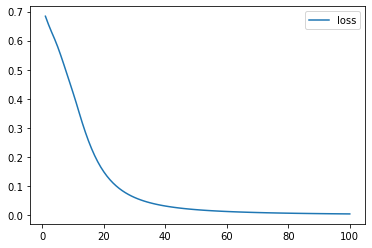

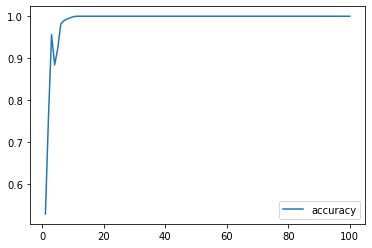

In [26]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

# Plot the accuracy
df.plot(y="accuracy")

# Evaluating the Model’s Performance
Now that our model has been properly trained, we can evaluate its performance using the test data. Testing a neural network model in TensorFlow is similar to testing a machine learning model in scikit-learn.

For this demonstration, we'll use the evaluate function. Then, we’ll print the testing loss and accuracy values, as shown in the code below:

In [27]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0032 - accuracy: 1.0000 - 109ms/epoch - 14ms/step
Loss: 0.0031841390300542116, Accuracy: 1.0


# Making Predictions with a Neural Network Model
Using our neural network model, we can use the predict function to generate predictions on new data by supplying the function with the data and a threshold of 0.5. Any value under 0.5 is classified as 0 and anything over 0.5 is classified as 1.

In [28]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)

# Make predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32") 

1/1 [==============================] - 0s 63ms/step


In [29]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})

# Display sample data
results.head(10)

,predictions,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


# Introduction to Deep Learning Models
Deep learning models are neural networks with multiple hidden layers. Unlike most other machine learning algorithms, including simple neural networks like the ones we created in the previous lesson, these models can discover nonlinear relationships among data. Therefore, deep learning models often perform better than other models when analyzing complex or unstructured data, such as images, text, or voice.

The number of hidden layers within a neural network model determines whether the model is considered deep learning. Precise definitions vary by source. In this course, we’ll classify any neural network with more than one hidden layer as “deep.” The following image demonstrates the difference between a neural network and a deep neural network (also called a deep neural net):


In [31]:
df = pd.read_csv("./wine_quality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [32]:
# Create the features (X) and target (y) sets
X = df.drop(columns=["quality"]).values
y = df["quality"].values

In [33]:
# Create the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create the scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

To define a deep neural net with Keras, we will use a process similar to the one we used to define a simple neural network. But, this time, we will add an additional hidden layer. In this demonstration, the second hidden layer will contain fewer neurons than the first. This is typically how deep neural nets are constructed: the number of neurons on each successive layer is equal to or less than the number of neurons on the previous layer, with the output layer containing the fewest neurons. As we did for our previous neural network, we will choose an activation function for the first layer. This time, we will also use this same activation function for our second hidden layer. Often, developers experiment with many potential architectures in an effort to minimize the loss metric.

In [34]:
# Define the model - deep neural net with two hidden layers
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

# Create a sequential neural network model
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn.add(Dense(units=1, activation="linear"))

In [35]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
deep_net_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
38/38 [==============================] - 0s 973us/step - loss: 34.7434 - mse: 34.7434
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 32.6987 - mse: 32.6987
Epoch 3/100
38/38 [==============================] - 0s 946us/step - loss: 31.5593 - mse: 31.5593
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 30.2544 - mse: 30.2544
Epoch 5/100
38/38 [==============================] - 0s 973us/step - loss: 28.2563 - mse: 28.2563
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 25.6191 - mse: 25.6191
Epoch 7/100
38/38 [==============================] - 0s 1000us/step - loss: 22.3844 - mse: 22.3844
Epoch 8/100
38/38 [==============================] - 0s 784us/step - loss: 18.5517 - mse: 18.5517
Epoch 9/100
38/38 [==============================] - 0s 892us/step - loss: 14.3735 - mse: 14.3735
Epoch 10/100
38/38 [==============================] - 0s 892us/step - loss: 10.3264 - mse: 10.3264
Epoch 11/100
38/38 [====

In [36]:
# Define the model - deep neural net with two hidden layers
number_input_features = 11
hidden_nodes_layer1 = 22
hidden_nodes_layer2 = 11

# Create a sequential neural network model
nn_1 = Sequential()

# Add the first hidden layer
nn_1.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_1.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn_1.add(Dense(units=1, activation="linear"))

# Compile the model
nn_1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
deep_net_model_1 = nn_1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
38/38 [==============================] - 0s 1000us/step - loss: 23.5283 - mse: 23.5283
Epoch 2/100
38/38 [==============================] - 0s 973us/step - loss: 15.4294 - mse: 15.4294
Epoch 3/100
38/38 [==============================] - 0s 974us/step - loss: 8.8470 - mse: 8.8470
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 4.2420 - mse: 4.2420
Epoch 5/100
38/38 [==============================] - 0s 1000us/step - loss: 2.5149 - mse: 2.5149
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 2.1178 - mse: 2.1178
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 1.9131 - mse: 1.9131
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 1.7589 - mse: 1.7589
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 1.6343 - mse: 1.6343
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 1.5350 - mse: 1.5350
Epoch 11/100
38/38 [=========================

In [37]:
# Define the model - deep neural net with two hidden layers
number_input_features = 11
hidden_nodes_layer1 = 22
hidden_nodes_layer2 = 11
hidden_nodes_layer3 = 8

# Create a sequential neural network model
nn_2 = Sequential()

# Add the first hidden layer
nn_2.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_2.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the third hidden layer
nn_2.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Add the output layer
nn_2.add(Dense(units=1, activation="linear"))

# Compile the model
nn_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
deep_net_model_2 = nn_2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
38/38 [==============================] - 0s 1ms/step - loss: 25.2523 - mse: 25.2523
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 14.5851 - mse: 14.5851
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 5.8436 - mse: 5.8436
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 3.1801 - mse: 3.1801
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 2.5399 - mse: 2.5399
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 2.1971 - mse: 2.1971
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 1.9581 - mse: 1.9581
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 1.7733 - mse: 1.7733
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 1.6207 - mse: 1.6207
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 1.4834 - mse: 1.4834
Epoch 11/100
38/38 [==============================] - 0

In [38]:
# Evaluate Model 1 using testing data
model1_loss, model1_mse = nn_1.evaluate(X_test_scaled, y_test, verbose=2)

# Evaluate Model 2 using testing data
model2_loss, model2_mse = nn_2.evaluate(X_test_scaled, y_test, verbose=2)

13/13 - 0s - loss: 0.4266 - mse: 0.4266 - 81ms/epoch - 6ms/step
13/13 - 0s - loss: 0.4435 - mse: 0.4435 - 85ms/epoch - 7ms/step


As shown in the preceding image, Model 1’s MSE is 0.4594, and Model 2’s MSE is 0.4584.

These results tell us that the difference between the two models’ mse metrics is quite small. So, in this case, we can use the simpler model with two hidden layers to make predictions.

Adding layers does not always guarantee better model performance. Depending on the input data’s complexity, adding more hidden layers sometimes just increases the chance of overfitting the training data. Unfortunately, no easy solution or rule of thumb exists to identify how many layers will maximize performance for a given model. Trial and error is the only way to determine how “deep” a deep learning model should be. You must train and evaluate a model with deeper and deeper layers, until the model no longer demonstrates noticeable improvements over the same number of epochs.

Next, we’ll put all of your new skills into practice!

# Introduction to Optimizing Neural Networks


In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path("./loan_status.csv")
)

# Review the DataFrame
df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [3]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [4]:
list(df.dtypes[df.dtypes == "object"].index)

['Loan_Status', 'Term', 'Years_in_current_job', 'Home_Ownership', 'Purpose']

In [5]:
# Create a list of the columns with categorical variables
categorical_variables = ["Loan_Status", "Term", "Years_in_current_job", "Home_Ownership", "Purpose"]

In [6]:
# Use the fit_transform function from the OneHotEncoder to encode the data
encoded_data = enc.fit_transform(df[categorical_variables])

In [7]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Display sample data
encoded_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Number of Layers
Deep neural networks are robust tools, but sometimes we don’t need a deep learning model to solve a business problem. For example, when dealing with data that is linearly separable, you do not typically need any hidden layers.

Recall that linearly separable data can be separated by a straight line when it’s plotted in two dimensions. For example, the following image depicts a linearly separable dataset that represents approved and not-approved credit card applications.

# Number of Nodes in Each Hidden Layer
The number of neurons that you include in each hidden layer can impact a deep learning model’s final output. So, this is an important decision. Using too few neurons could lead to underfitting the model—meaning you will not achieve the model’s best possible performance. On the other hand, including too many neurons could result in overfitting—meaning the model may not generalize well to other datasets.

Developers use a few methods to determine the optimal number of neurons for a hidden layer:

Find the mean of the number of input features and the number of neurons in the output layer ((number of input features + number of neurons in output layer) / 2). Use a number close to this mean for the number of neurons in the first hidden layer. Repeat this pattern for subsequent hidden layers ((number of neurons in the prior hidden layer + number of neurons in output layer) / 2). This rule normally works well for the first approximation.

The total number of neurons across all hidden layers should be ⅔ the size of the input layer (size of input layer = number of features), plus the size of the output layer (size of output layer = number of neurons on the output layer).

Alternatively, the total number of neurons across all hidden layers should be less than twice the size of the number of features in the input layer.

These rules provide a starting point for designing a neural network. Ultimately, however, we can only discover the best architectures for our neural network models by trial-and-error testing.

# Activation and Loss Functions
Selecting the best activation and loss functions is, once again, part experience and part trial-and-error testing. As you gain more experience using neural networks, and machine learning in general, you will develop preferences for certain functions in certain use cases. In the meantime, you can use the following recommendations as starting points:

For the activation function on a hidden layer, use relu.

For the activation function on an output layer, use sigmoid for binary classification, softmax for multi-class classification, and linear for regression.

Choose the loss function based on the type of problem you’re solving, too. For binary classification, use binary_crossentropy. For multi-class classification, use categorical_crossentropy if you encode the variables using OneHotEncoder. Or, use sparce_categorical_crossentropy if the labels are integers. Finally, use mse for regression.

# Number of Epochs
The number of epochs that we run can have an important effect on the model. Achieving the optimal number of epics helps improve the model's evaluation metrics. Usually, we vary the number of epochs as we test a model, seeking to minimize the model's loss value.

A good rule of thumb is to start training a model with 20 epochs. Then, we can plot the model’s loss value and evaluation metric over the course of those 20 epochs. With these plots, we can verify whether the model’s training loss decreases over the epochs, and whether its accuracy (for classification) increases, or its mean squared error (for regression) moves toward zero. We can then continue training the model, increasing the number of epochs by 20 on each trial. After each new trial, we’ll again verify that the model’s loss and evaluation metric move in the directions we want.

# Saving and Loading a Neural Network Model
Neural networks, especially complex neural networks, may demand significant computational resources, including CPU memory and activity on the allotted server. Training a complex neural network on a medium or large dataset can take hours (or even days)! For simple modeling problems like the ones covered in this module, we can train a model in the same notebook where we analyze our data. However, for more formal applications of neural networks and deep learning models, data scientists cannot afford the time or resources to build and train a model each time they analyze data. In these cases, they must store and access trained models outside of the training environment.

Data scientists publish trained models in scientific papers, deploy them in software, share them on GitHub, and even pass them along to colleagues.

In [8]:
# Define the model - deep neural net with two hidden layers
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 6
# Create a sequential neural network model
nn_1 = Sequential()


# Add the first hidden layer
nn_1.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn_1.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer
nn_1.add(Dense(units=1, activation="linear"))

# Compile model
nn_1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
deep_net_model_1 = nn_1.fit(X_train_scaled, y_train, epochs=100)

NameError: name 'Sequential' is not defined